<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 δείγματα του φυτού <i>Ίρις</i> με βάση τα δεδομένα που σας δίνονται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε δείγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο σύνολο δεδομένων του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε τον βέλτιστο αριθμό των <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση το βέλτιστο αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πως λειτουργεί ο αλγόριθμος.</li>
<li>Να σχεδιάσετε τις πραγματικές κλάσεις, καθώς και τις κλάσεις που προκύπτουν από το μοντέλο <i>k-means</i>. Τι παρατηρείτε;</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>). Αναλύστε τα
αποτελέσματα. Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι
αριθμοί που χρησιμοποιούνται στο <i>iris.target</i> για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο <i>k-means</i> για τον ορισμό των <i>clusters</i>.</li>
</ul>

In [33]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()

In [3]:
#print is optional
print(iris.data)
iris.feature_names
print(iris.target)
iris.target_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [5]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [6]:
print(x.head(2))

print(y.head(2))

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
   Targets
0        0
1        0


### Το K-means είναι un-supervised μέθοδος επομένως δε θα χρειαστούμε το y (target). Θα παρατηρήσουμε μόνο το πόσες κλάσεις έχει από το σύνολο του y.

In [7]:
y['Targets'].unique()

array([0, 1, 2])

### παρατηρούμε πως έχει 3 κλάσεις , άρα 3 ομάδες. Παρακάτω βλέπουμε το διάγραμμα διασποράς.

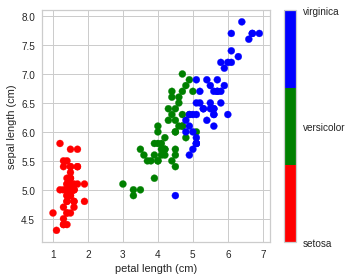

In [13]:
# The indices of the features that we are plotting
x_index = 2
y_index = 0

#iris.target_names - > array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
colors = ['red','green','blue']

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target,cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

είναι σχετικά εμφανές πως και γραφικά φαίνεται να έχουμε 3 κλάσεις. Τώρα θα δούμε τι θα αποτέλεσμα για το clustering του dataset θα μας δώσει ο αλγόριθμος k-means.

## Elbow Method using yellowbrick 

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


### calinski harabasz method (αναλογία μεταξύ εντός και μεταξύ διασποράς συστάδας.)

το σκορ δίνεται από τον εξής τύπο:

    CH(k) = [B(k)/(k − 1)] / [W(k)(n − k)]
    
όπου B(k) είναι το variance μεταξύ ομάδων (δηλαδή το άθροισμα των
τετραγωνικών αποστάσεων για τα clusters k), και W(k) είναι το intra-cluster
variance. Μεγιστοποίηση του CH (k) έναντι διαφορετικών τιμών
του k δίνει τον εκτιμώμενο αριθμό συστάδων.

πηγή: 2018 Estimating the number of clusters using diversity, Suneel Kumar Kingrani, Mark Levene, Dell Zhang∗
Birkbeck, University of London, UK 

https://eprints.bbk.ac.uk/20714/

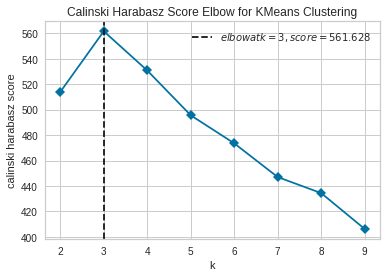

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Παρατηρούμε πως βρίσκει K=3 όπως και το αρχικό μοντέλο. Για τις άλλες μετρικές που δίνουν οι βιβλιοθήκες παίρναμε κ=4 και στο άλλο δεν υπήρχε σημείο elbow.

### Διάγραμμα διασποράς για K=3 και σύγκριση με το πραγματικό 

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
labels_k_3 = kmeans.labels_

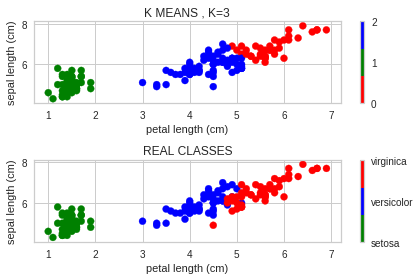

In [30]:
fig = plt.figure()
plt.subplot(2, 1, 1)

colors = ['red','green','blue']

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=labels_k_3 ,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.title('K MEANS , K=3')
plt.colorbar(ticks=[0, 1, 2])


plt.subplot(2, 1, 2)


#iris.target_names - > array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
colors=['green','blue','red']
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.title('REAL CLASSES')

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target,cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()


plt.show()

#### Distortion method

(ότι και  ο τρόπος παρακάτω στο scikit δηλαδή.)

Ο αλγόριθμος Κ-μέσων στοχεύει στην επιλογή κεντροειδών που ελαχιστοποιούν το within-cluster άθροισμα των τετραγώνων(δηλαδή μείωση απόστασης κάθε δείγματος στο cluster που ανήκουν). 

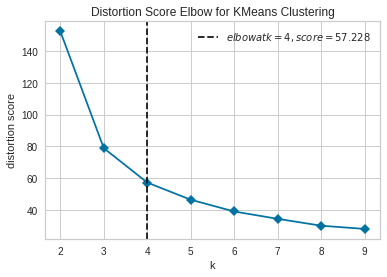

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Another elbow implementation using scikit only

Ο αλγόριθμος Κ-μέσων στοχεύει στην επιλογή κεντροειδών που ελαχιστοποιούν το within-cluster άθροισμα των τετραγώνων(δηλαδή μείωση απόστασης κάθε δείγματος στο cluster που ανήκουν).

Text(0.5, 1.0, 'Elbow curve')

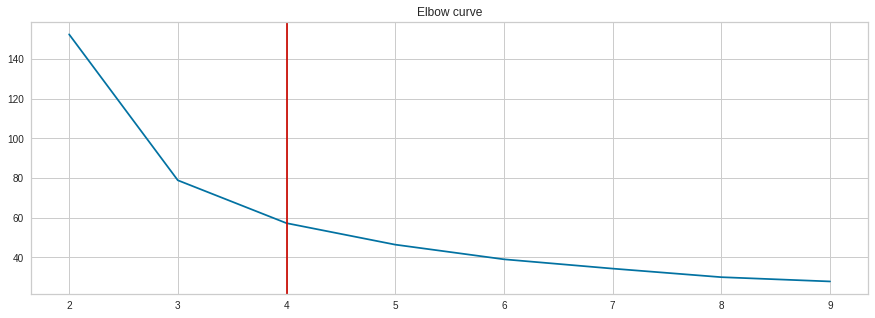

In [16]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.axvline(x=4, color='r', linestyle='-')
plt.grid(True)
plt.title('Elbow curve')

Η συγκεκριμένη μέθοδος μας δίνει K = 4 (όπως η μέθοδος distortion στην προηγούμενη υλοποίηση)

### Διάγραμμα Διασποράς με k=4 για να το συγκρίνουμε με το αρχικό διάγραμμα διασποράς με τις πραγματικές κλάσεις.

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
labels = kmeans.labels_

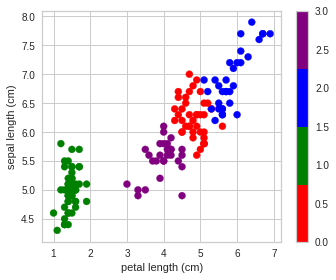

In [47]:
# The indices of the features that we are plotting
x_index = 2
y_index = 0

#iris.target_names - > array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# this formatter will label the colorbar with the correct target names

colors = ['red','green','blue','purple']

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.colorbar()
plt.show()

### Σύγκριση των 2 διαγραμμάτων διασποράς

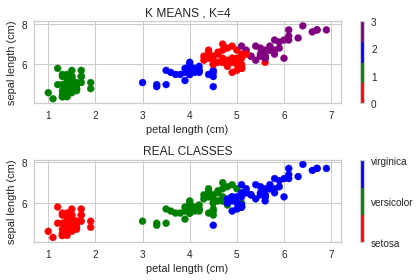

In [71]:
fig = plt.figure()
plt.subplot(2, 1, 1)


colors = ['red','green','blue','purple']

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.title('K MEANS , K=4')
plt.colorbar(ticks=[0, 1, 2,3])


plt.subplot(2, 1, 2)

colors = ['red','green','blue']


#iris.target_names - > array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.title('REAL CLASSES')

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target,cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()


plt.show()

Παρατηρούμε πως ο αλγόριθμος k means δημιουργεί άλλη μια ομάδα ανάμεσα στη μωβ και μπλε πρότυπα με κόκκινο χρώμα.

### Τρόπος λειτουργίας k - means:

Ο αλγόριθμος κ-means δουλεύει με τον εξής τρόπο. Έστω ότι έχουμε n δείγματα d- διαστάσεων. Τότε ο αλγόριθμος αυτός θα διαχωρίσει αυτά τα δείγματα σε ένα αριθμό K , αρκετά μικρότερο του n (K <<n), έτσι ώστε να ελαχιστοποιήσει την απόσταση τετραγώνων ανάμεσα στην κάθε συστάδα.

Ο αλγόριθμος αυτός είναι μια ειδική περίπτωση expectation-maximization. Πρώτα, αρχικοποιούμε τυχαία Κ μέσους. Έπειτα ακολουθεί το E-step το οποίο είναι να υπολογίσει σε ποιο μέσο είναι πιο κοντά το κάθε πρότυπο και να το κάνει assign εκεί. To M-step είναι ο υπολογισμός των νέων μέσων για όλες τις Κ συστάδες ανάλογα με τα πρότυπα που έχουν γίνει assign σε αυτά.

Ο αλγόριθμος συγκλίνει όταν δεν αλλάζουν άλλο οι συστάδες και έχουμε το ίδιο αποτέλεσμα για τους μέσους στο επόμενο iteration.


### Error Matrix ή Confusion Matrix, ανάλυση των αποτελεσμάτων. 

(Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι αριθμοί που χρησιμοποιούνται στο iris.target για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο k-means για τον ορισμό των clusters.)

Για να έχουμε ίδιες κλάσεις, θα κάνουμε K means για K= 3 , όπως είδαμε κιόλας στο ένα elbow graph ότι είναι το optimal Κ. (optimal K=3 με μέθοδο calinski_harabasz , ενώ optimal k = 4 για μέθοδο sum of squares within groups)

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
labels_k_3 = kmeans.labels_

In [65]:
labels_k_3 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
confusion_matrix(iris.target, labels_k_3 )

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [67]:
print(classification_report(iris.target, labels_k_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



Από το confusion matrix βλέπουμε πως την κατηγορία 0 την προβλέπει σωστά το k means , ενώ στην 1 κάνει 2 λάθη και τα προβλέπει ως 3. Επίσης από την 3η κατηγορία κάνει διάφορα λάθη τα οποία τα προβλέπει ως 2η κατηγορία.

Στη συνέχεια βλέπουμε και στο classification report τα precision recall f1 score  accuracy κλπ. Παρατηρούμε πως ο αλγόριθμος μας δίνει 89% accuracy.

#### διάγραμμα διασποράς με το τελευταίο μοντέλο που κάναμε το confusion matrix (γιατί κάθε φορά που τρέχουμε το k means αλλάζει ο τρόπος που αναθέτει τα labels...οπότε δε θα είναι ολόιδιο με το προηγούμενο για k=3)

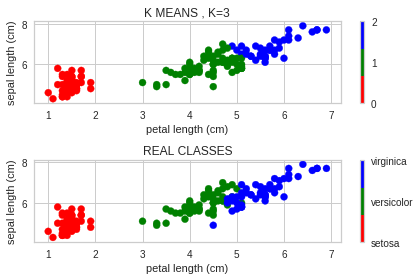

In [69]:
fig = plt.figure()
plt.subplot(2, 1, 1)

colors = ['red','green','blue']

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=labels_k_3 ,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.title('K MEANS , K=3')
plt.colorbar(ticks=[0, 1, 2])


plt.subplot(2, 1, 2)


#iris.target_names - > array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
colors = ['red','green','blue']
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.title('REAL CLASSES')

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target,cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()


plt.show()